In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define

In [2]:
def birth(tau, M, c):
    """
    Get the change in number of molecules to each cell of matrix M 
    by birth,
    the propensity in each cell is 
    c
    """
    
    # Get the propensity 
    P = c

    # Get the change (positive cause of birth)
    Z = np.random.poisson(lam=tau*P, size=M.shape)
    
    return Z

In [3]:
def die(tau, M, c):
    """
    Get the change in number of molecules to each cell of matrix M 
    by death,
    the propensity in cell i is
    c * M_i
    """

    # Get the propensity
    P = c * M

    # Get the change (negative cause of death)
    Z = -1 * np.random.poisson(lam=tau*P)
    
    return Z

In [4]:
def react(tau, M_A, M_B, c):
    """
    Get the change in number of molecules to each cell of matrices
    M_A and M_B, respectively
    by the reaction of species A and B according to the equation:
    2A + B -> 3A
    where the propensity in cell i is
    c * M_A_i * (M_A_i - 1) * M_B_i
    """
    

    # Get the propensity
    P = c * M_A * (M_A - 1) * M_B

    # Get the change
    Z = np.random.poisson(lam=tau*P)
    
    # The change is plus one for A and minus one for B
    Z_A = 1 * Z
    Z_B = -1 * Z
    
    return Z_A, Z_B

In [5]:
def diffuse(tau, M, d):
    """
    Get the change in number of molecules to each cell of matrix M 
    by diffusion in each of four directions,
    the propensity in cell i is
    d * M_i
    """
    
    # Get the matrix of propensity functions (for each cell)
    P  = d * M
    
    # Get the amount diffused in each of four directions
    Ds = np.random.poisson(lam=tau*P, size=(4,) + M.shape)
    
    # Zero matrix (for calculating difference vector)
    Z = np.zeros(shape=M.shape)
    
    ### 1. Take from top of matrix and give to bottom of matrix 
    # Make D equal to all of first of Ds except bottom row
    D = Ds[0]  # grab first direction (down)
    D = D[:-1,:]  # get top (index all except bottom row)
    Z[:-1,:] -= D  # subtract from top
    Z[1:,:] += D  # add to bottom

    ### 2. Take from bottom of matrix and give to top of matrix  
    # Make D equal to all of second of Ds except top row
    D = Ds[1]  # grab second direction (up)
    D = D[1:,:]  # grab bottom (index all except top row)
    Z[1:,:] -= D  # subtract from bottom
    Z[:-1,:] += D  # add to top

    ### 3. Take from left of matrix and give to right of matrix
    D = Ds[2]  # grab third direction (right)
    D = D[:,:-1]  # grab left
    Z[:,:-1] -= D  # subtract from left
    Z[:,1:] += D  # add to right

    ### 4. Take from right of matrix and give to left of matrix
    D = Ds[3]  # grab fourth direction (left)
    D = D[:,1:]  # grab right
    Z[:,1:] -= D  # subtract from right
    Z[:,:-1] += D  # add to left
    
    return Z

In [6]:
def calculate(X_A, X_B, t):
    """
    Calculate the number of molecules in each cell of the A and B grids
    for time t+1.
    """
    
    # Birth
    Z_A_birth = birth(tau, M=X_A[t], c=mu)
    Z_B_birth = birth(tau, M=X_B[t], c=beta)


    # Die
    Z_A_death = die(tau, M=X_A[t], c=alpha)


    # React
    Z_A_react, Z_B_react = react(tau, X_A[t], X_B[t], c=kappa)


    # Diffuse
    Z_A_diffusion = diffuse(tau, M=X_A[t], d=d_A)
    Z_B_diffusion = diffuse(tau, M=X_B[t], d=d_B)
    
    
    # Calculate next grid
    X_A[t+1] = X_A[t] + Z_A_birth + Z_A_death + Z_A_react + Z_A_diffusion
    X_B[t+1] = X_B[t] + Z_B_birth + Z_B_react + Z_B_diffusion

### Set

In [90]:
### Set initialization parameters ###

# Inital populations  are homogenous, i.e. equal in each cell.
A_init = 1000  
B_init = 1000

In [91]:
### Set the rate parameters  ###

# Birth parameter for species A
mu = 2

# Birth parameter for species B
beta = 2


# Death parameter for species A
alpha = 0.001


# Reaction parameter for "2A + B -> 3A" 
kappa = 10 * (A_init*A_init*B_init)**-1


# Diffusion parameters for species A and B
d_A = 0.02  
d_B = 0.02

In [92]:
#### Set gridsize parameters ###

m = 1000  # number of rows
n = 1000 # number of columns

In [100]:
### Set the time interval ###
tau = 2

In [94]:
### Set runtime parameter ###

N_t = 100  # number of units of time

### Run

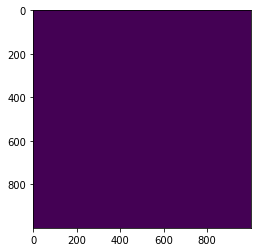

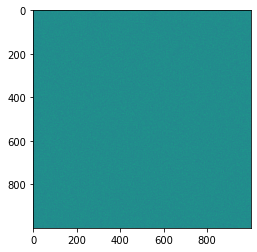

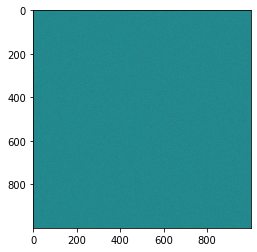

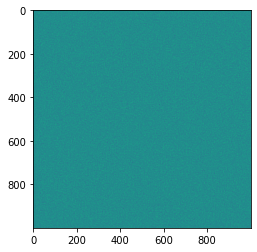

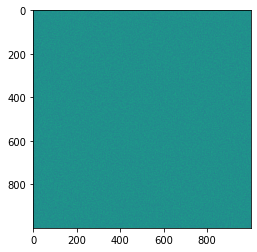

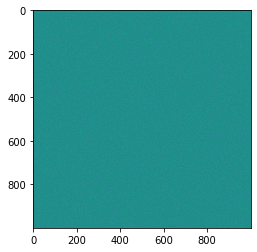

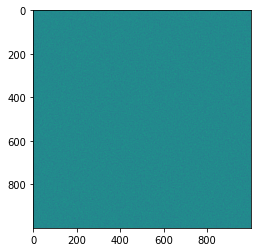

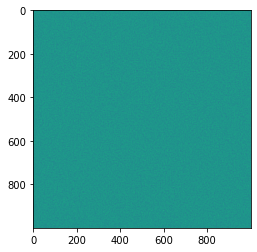

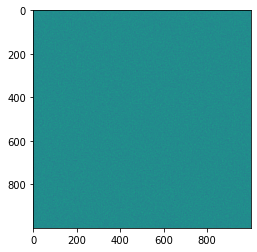

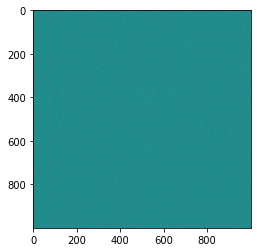

In [101]:
# Initialize the grid of cells for A and B populations
shape = (N_t, m, n)  # index by time, row, column

X_A = np.zeros(shape)  # set A population at all times to zero (simplicity)
X_A[0] += A_init  # add initial A population for time zero

X_B = np.zeros(shape)  # do the same as above for B...
X_B[0] += B_init


# Loop through time
for t in np.arange(N_t-1):
    if t % 10 == 0:
        plt.imshow(X_A[t])
        plt.show()
    calculate(X_A, X_B, t)

In [105]:
X_A[-1].mean()

2371.464494

In [106]:
X_A[-1].std()

51.13274146106352

In [107]:
X_B[-1]

array([[47., 27., 41., ..., 33., 28., 37.],
       [32., 37., 32., ..., 31., 33., 42.],
       [25., 35., 29., ..., 41., 33., 32.],
       ...,
       [27., 39., 36., ..., 40., 48., 43.],
       [30., 51., 30., ..., 47., 37., 36.],
       [39., 38., 43., ..., 42., 51., 40.]])

In [108]:
X_B[-1].std()

6.580019845587018